# Project: European Soccer Regression

<hr>

**TASK:**
* Make a model to predict players overall rating based on metrics
* Predict the outcome of the games

**ACQUIRE**

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# import data 
data = pd.read_parquet('./data/soccer.parquet')
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [3]:
data.shape

(183978, 41)

In [4]:
data.columns

Index(['player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

**PREPARE**

In [5]:
data.dtypes

player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penaltie

To select columns with numeric data:
`.select_dtypes(include='number')`

In [6]:
# numeric features
data.select_dtypes(include='number')

,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183974,102359,39902,83.0,85.0,84.0,77.0,59.0,89.0,77.0,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183975,102359,39902,78.0,80.0,74.0,76.0,53.0,84.0,77.0,85.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,102359,39902,77.0,80.0,74.0,71.0,53.0,84.0,77.0,85.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0


In [7]:
# check for missing values
data.isnull().any()

player_fifa_api_id     False
player_api_id          False
date                   False
overall_rating          True
potential               True
preferred_foot          True
attacking_work_rate     True
defensive_work_rate     True
crossing                True
finishing               True
heading_accuracy        True
short_passing           True
volleys                 True
dribbling               True
curve                   True
free_kick_accuracy      True
long_passing            True
ball_control            True
acceleration            True
sprint_speed            True
agility                 True
reactions               True
balance                 True
shot_power              True
jumping                 True
stamina                 True
strength                True
long_shots              True
aggression              True
interceptions           True
positioning             True
vision                  True
penalties               True
marking                 True
standing_tackl

In [8]:
data.isnull().sum()

player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle         836
sliding_tackle      

In [9]:
# percentage of missing data
data.isnull().sum()/len(data)*100

player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
positioning            0.454402
vision  

In [10]:
# drop missing values
data = data.dropna(axis=0)

In [11]:
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [12]:
data.isnull().sum()

player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0
gk_positioning         0


<AxesSubplot:ylabel='Frequency'>

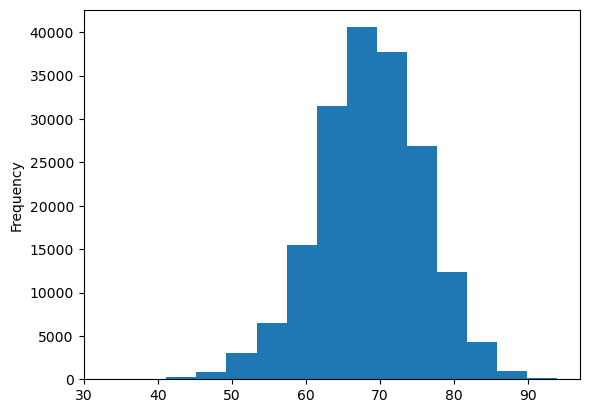

In [15]:
# Make histogram of `overall_rating`
data['overall_rating'].plot.hist(bins=15)

In [16]:
data['overall_rating'].unique()

array([67., 62., 61., 74., 73., 71., 70., 69., 68., 65., 64., 54., 51.,
       52., 47., 53., 66., 59., 75., 72., 76., 78., 77., 79., 60., 80.,
       81., 82., 84., 48., 63., 83., 55., 58., 50., 56., 49., 57., 42.,
       46., 45., 85., 44., 86., 89., 87., 88., 91., 40., 90., 41., 43.,
       38., 93., 92., 39., 33., 36., 37., 35., 94.])

**ANALYSE**
<hr>

### Feature and target selection
* The target data given by `overall_rating`

In [24]:
data.select_dtypes(include='number').corr()['overall_rating']

player_fifa_api_id   -0.278703
player_api_id        -0.328315
overall_rating        1.000000
potential             0.765435
crossing              0.357320
finishing             0.330079
heading_accuracy      0.313324
short_passing         0.458243
volleys               0.361739
dribbling             0.354191
curve                 0.357566
free_kick_accuracy    0.349800
long_passing          0.434525
ball_control          0.443991
acceleration          0.243998
sprint_speed          0.253048
agility               0.239963
reactions             0.771856
balance               0.160211
shot_power            0.428053
jumping               0.258978
stamina               0.325606
strength              0.315684
long_shots            0.392668
aggression            0.322782
interceptions         0.249094
positioning           0.368978
vision                0.431493
penalties             0.392715
marking               0.132185
standing_tackle       0.163986
sliding_tackle        0.128054
gk_divin

In [34]:
# features and target
dataset = data.select_dtypes(include='number')
X = dataset.drop(['overall_rating','player_fifa_api_id','player_api_id'],axis=1)
y = dataset['overall_rating']

In [35]:
X.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [36]:
y.head()

id
1    67.0
2    67.0
3    62.0
4    61.0
5    61.0
Name: overall_rating, dtype: float64

In [37]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [38]:
# train the model

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [39]:
# predict on test data
y_pred = model.predict(X_test)

In [40]:
r2_score(y_pred,y_test)

0.8143675452096683